In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:

# 📄 Leer datos
df = pd.read_csv("../data/aptos_bogota_enriched.csv")
# df = df.drop("estrato", axis=1).rename(columns={"estrato_calculado": "estrato"})

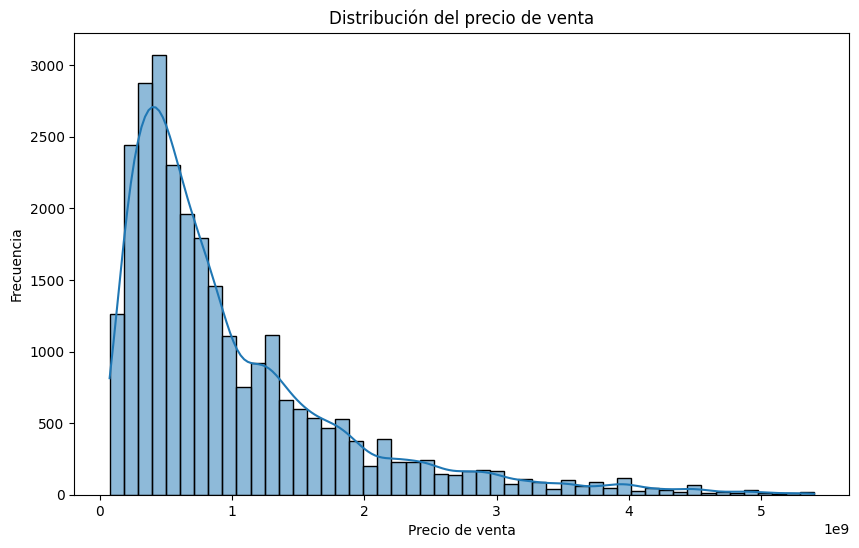

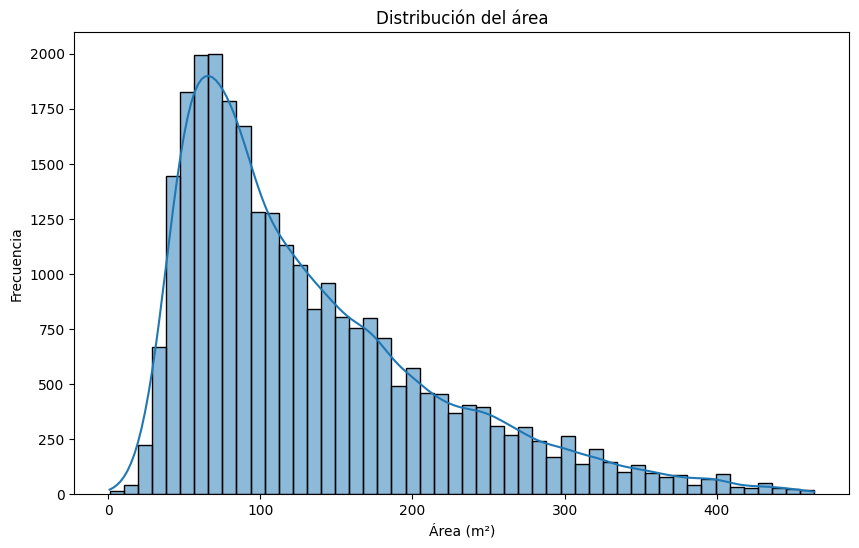

In [6]:
# ------ DISTRIBUCIONES BÁSICAS ------
plt.figure(figsize=(10,6))
sns.histplot(df['precio_venta'], bins=50, kde=True)
plt.title("Distribución del precio de venta")
plt.xlabel("Precio de venta")
plt.ylabel("Frecuencia")
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(df['area'], bins=50, kde=True)
plt.title("Distribución del área")
plt.xlabel("Área (m²)")
plt.ylabel("Frecuencia")
plt.show()


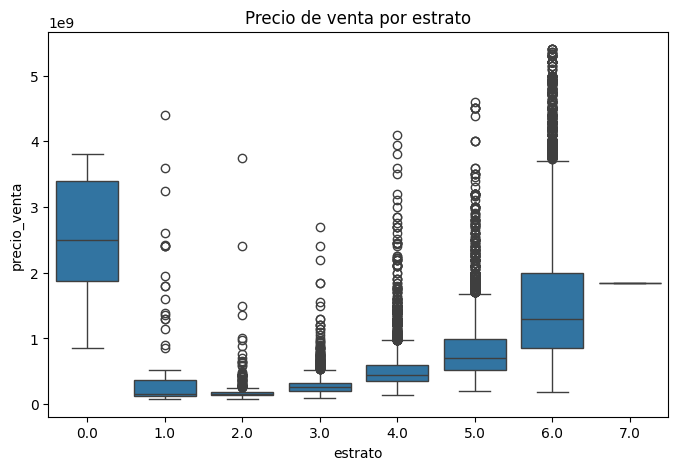

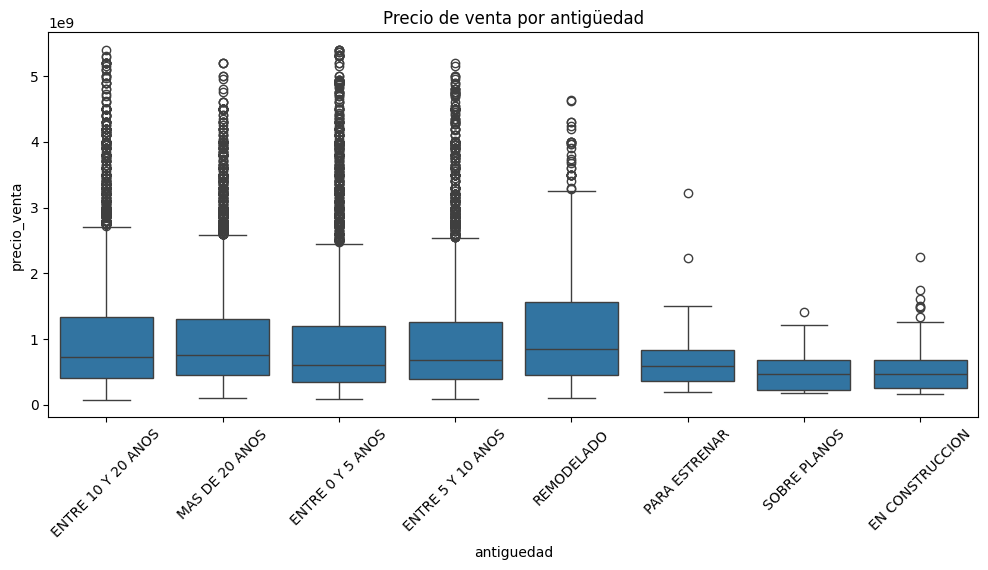

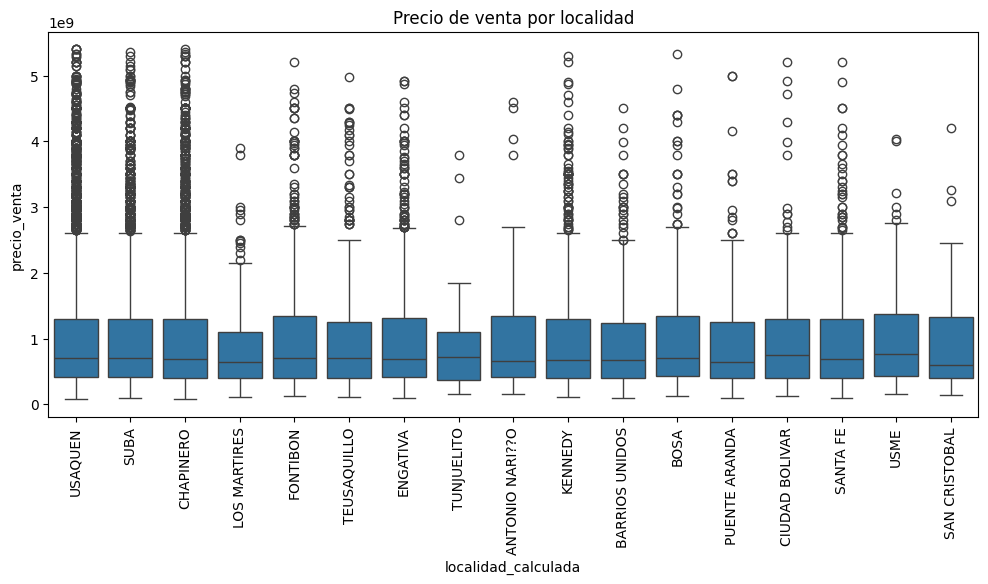

In [7]:
# ------ BOX PLOTS por CATEGORÍAS ------
plt.figure(figsize=(8,5))
sns.boxplot(x='estrato', y='precio_venta', data=df)
plt.title("Precio de venta por estrato")
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(x='antiguedad', y='precio_venta', data=df)
plt.title("Precio de venta por antigüedad")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(x='localidad_calculada', y='precio_venta', data=df)
plt.title("Precio de venta por localidad")
plt.xticks(rotation=90)
plt.show()



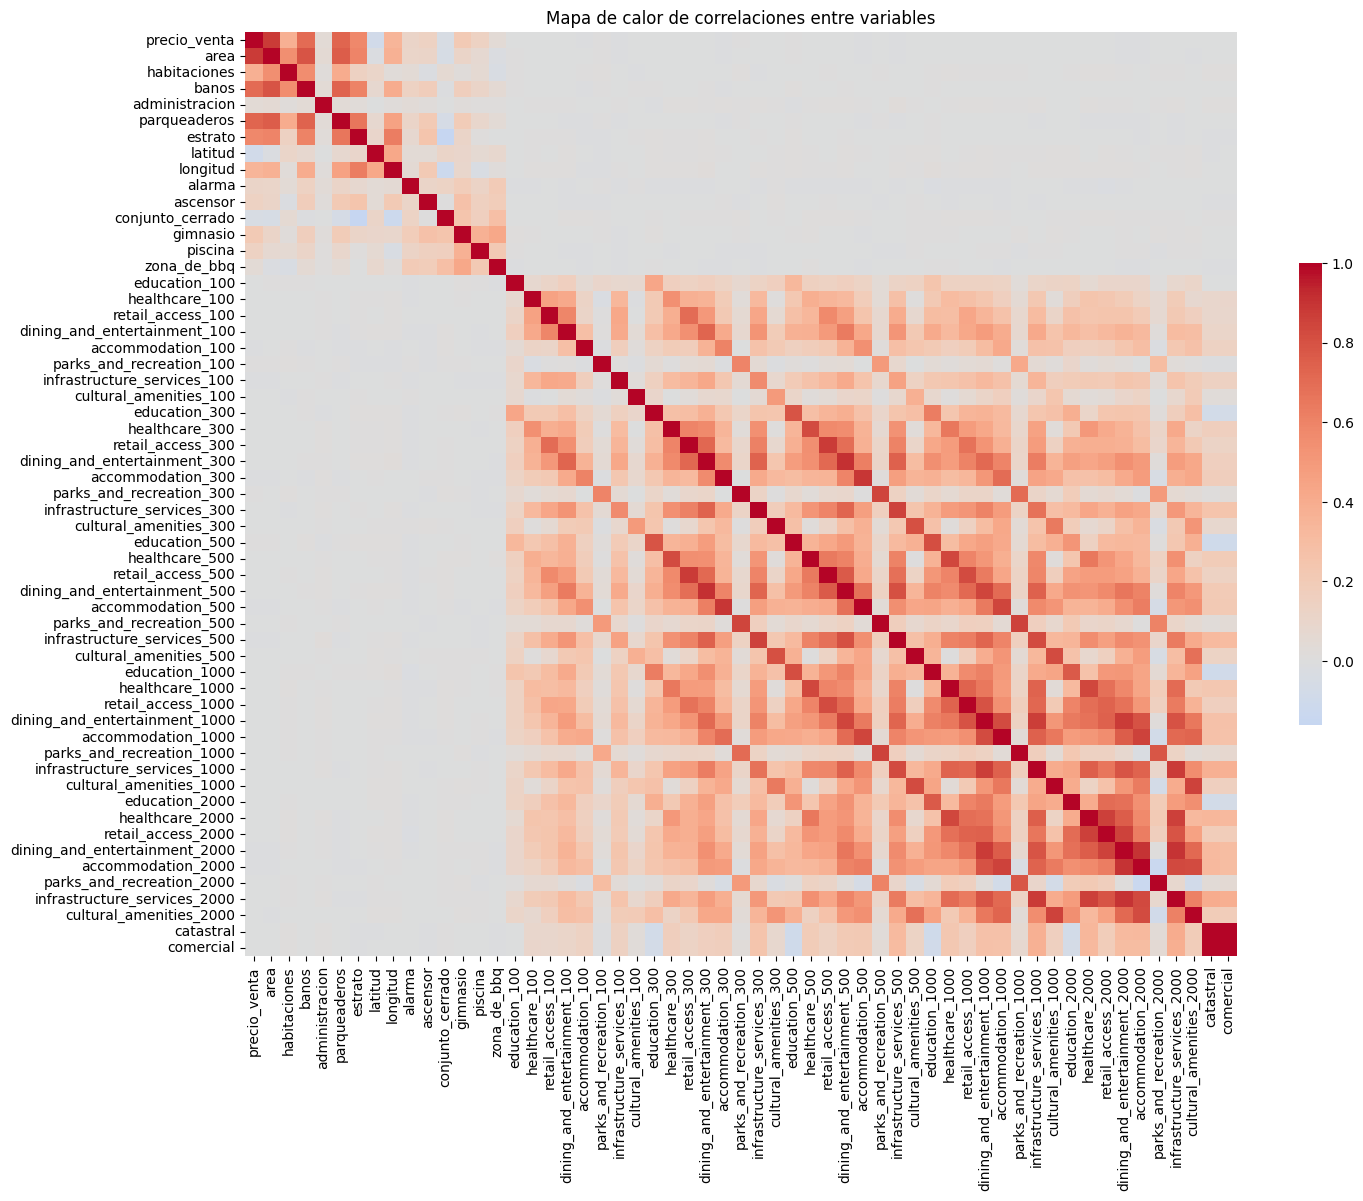

In [8]:
# ------ MAPA DE CALOR DE CORRELACIONES ------
corr = df.corr(numeric_only=True)  # incluye todas las numéricas
plt.figure(figsize=(16,12))
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt='.2f', center=0, cbar_kws={'shrink':.5})
plt.title("Mapa de calor de correlaciones entre variables")
plt.show()



Correlación de variables contextuales con precio_venta:
precio_venta                     1.000000
parks_and_recreation_100         0.005931
education_500                    0.005529
parks_and_recreation_300         0.003252
education_100                    0.002565
healthcare_100                   0.001989
cultural_amenities_100           0.001498
retail_access_1000               0.001404
retail_access_500                0.001383
education_1000                   0.001308
education_300                    0.001230
retail_access_300                0.000330
healthcare_1000                 -0.000734
education_2000                  -0.001265
retail_access_100               -0.001574
healthcare_500                  -0.001848
dining_and_entertainment_300    -0.002063
cultural_amenities_300          -0.002090
infrastructure_services_300     -0.002692
dining_and_entertainment_500    -0.002887
parks_and_recreation_500        -0.003022
dining_and_entertainment_1000   -0.003031
dining_and_entertai

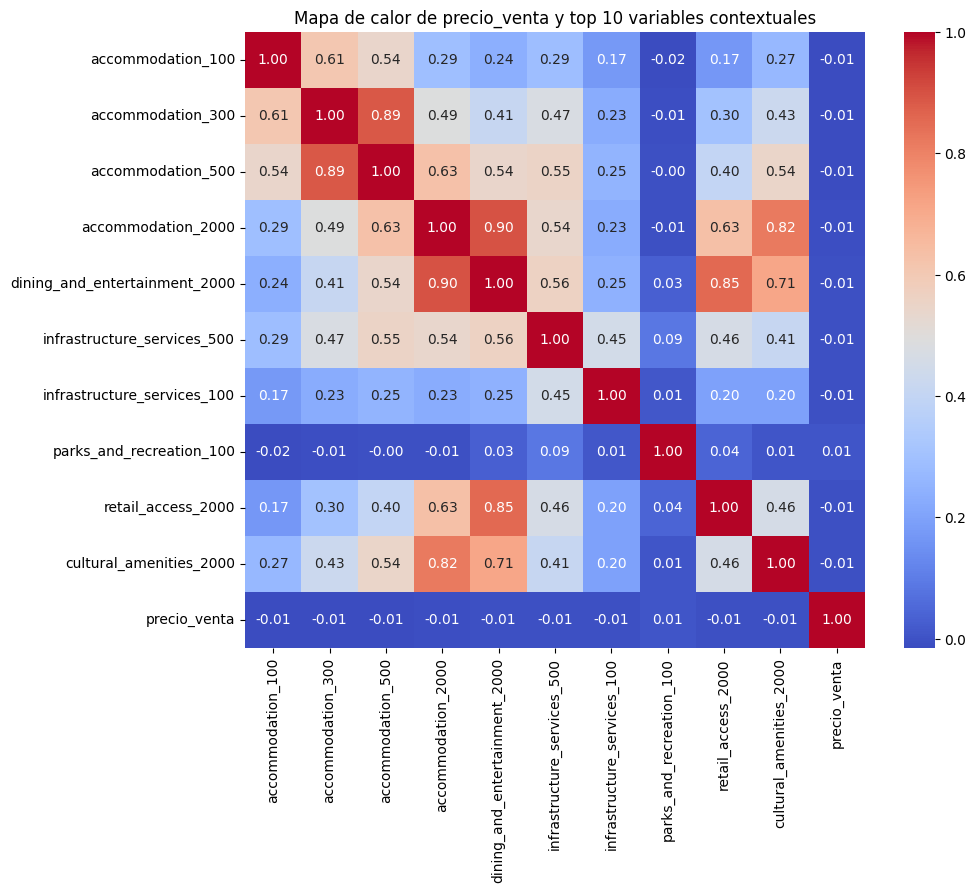

In [10]:

# ------ VARIABLES CONTEXTUALES ------
context_cols = [col for col in df.columns if any(key in col for key in ["education", "healthcare", "parks", "retail", "dining", "accommodation", "infrastructure", "cultural"])]

# Correlaciones con precio_venta para las contextuales
context_corr = df[context_cols + ['precio_venta']].corr()['precio_venta'].sort_values(ascending=False)
print("\nCorrelación de variables contextuales con precio_venta:")
print(context_corr)

# Gráfico separado para las más relevantes
top_context = context_corr.drop("precio_venta").abs().sort_values(ascending=False).head(10).index
plt.figure(figsize=(10,8))
sns.heatmap(df[top_context.tolist() + ['precio_venta']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Mapa de calor de precio_venta y top 10 variables contextuales")
plt.show()

In [9]:
df['antiguedad'].unique()

array(['ENTRE 10 Y 20 ANOS', 'MAS DE 20 ANOS', 'ENTRE 0 Y 5 ANOS',
       'ENTRE 5 Y 10 ANOS', 'REMODELADO', 'PARA ESTRENAR', 'SOBRE PLANOS',
       'EN CONSTRUCCION', nan], dtype=object)